<a href="https://colab.research.google.com/github/ayushi15092002/mental-health-workload/blob/main/Feature_Selection_Embedded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectFromModel
# from feature_selection import embedded_method
# plt.style.use('seaborn-colorblind')
# %matplotlib inline


## Load Dataset

In [ ]:
data = pd.read_excel(r'/content/drive/My Drive/drdo/features/min_max_norm.xlsx')

In [ ]:
data.head(5)

,Coeffiecient_of_Variation,Mean_of_Vertex_to_Vertex_Slope,Variance_of_Vertex_to_Vertex_Slope,Hjorth_Activity,Hjorth_Mobility,Hjorth_Complexity,Kurtosis,2nd_Difference_Mean,2nd_Difference_Max,Skewness,...,28_Wavelet_Approximate_Std_Deviation,28_Wavelet_Approximate_Energy,28_Wavelet_Detailed_Mean,28_Wavelet_Detailed_Std _Deviation,28_Wavelet_Detailed_Energy,28_Wavelet_Approximate_Entropy,28_Wavelet_Detailed_Entropy,Hurst_Exponent,Permutation_Entropy,y
0,0.534439,0.614380,0.096161,0.020099,0.555111,0.052773,0.159801,0.248315,0.320428,0.528456,...,0.103340,0.009270,0.384685,0.344930,0.171401,0.184330,0.011559,0.723232,0.818775,1.0
1,0.534315,0.649929,0.068544,0.025495,0.455425,0.084819,0.133192,0.202098,0.254608,0.543443,...,0.146594,0.008348,0.571264,0.323252,0.155246,0.166751,0.010475,0.728989,0.812935,1.0
2,0.534344,0.583582,0.112827,0.027777,0.494449,0.070979,0.099703,0.281429,0.347117,0.595850,...,0.081346,0.004189,0.484646,0.452760,0.262473,0.278811,0.005396,0.751985,0.878779,1.0
3,0.542825,0.572106,0.097661,0.033724,0.452482,0.085299,0.141227,0.260114,0.302845,0.450263,...,0.141749,0.008017,0.776456,0.437634,0.248645,0.263571,0.010023,0.590368,0.849525,1.0
4,0.534477,0.629300,0.097666,0.029060,0.475090,0.078828,0.121195,0.253848,0.293299,0.568707,...,0.119258,0.008177,0.550035,0.382984,0.201500,0.215768,0.010123,0.612329,0.855054,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['y'], axis=1), 
                                                    data.y, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((9256, 246), (2314, 246))

## Lasso
Regularization with Lasso.Lasso (L1) has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model

In [ ]:
# linear models benefit from feature scaling

scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler()

In [ ]:
# fit the LR model
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
X = scaler.transform(X_train)
sel_.fit(X, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SelectFromModel(estimator=LogisticRegression(C=1))

In [ ]:
# make a list with the selected features
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 246
selected features: 92
features with coefficients shrank to zero: 0


In [ ]:
# we can identify the removed features like this:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

IndexError: ignored

In [ ]:
# remove the features from the training and testing set

X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))

X_train_selected.shape, X_test_selected.shape

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


((9256, 92), (2314, 92))

## Random Forest Importance


Feature ranking:
1. feature no:16 feature name:Delta/Theta (0.015806)
2. feature no:245 feature name:Permutation_Entropy (0.014126)
3. feature no:13 feature name:FFT_Theta_MaxPower (0.009803)
4. feature no:18 feature name:Theta/Alpha (0.009090)
5. feature no:114 feature name:12_Wavelet_Approximate_Entropy (0.008595)
6. feature no:84 feature name:9_Wavelet_Approximate_Mean (0.008399)
7. feature no:185 feature name:21_Wavelet_Detailed_Energy (0.007884)
8. feature no:184 feature name:21_Wavelet_Detailed_Std _Deviation (0.007374)
9. feature no:178 feature name:20_Wavelet_Approximate_Entropy (0.007359)
10. feature no:112 feature name:12_Wavelet_Detailed_Std _Deviation (0.007354)
11. feature no:221 feature name:26_Wavelet_Approximate_Std_Deviation (0.007116)
12. feature no:5 feature name:Hjorth_Complexity (0.006901)
13. feature no:121 feature name:13_Wavelet_Detailed_Energy (0.006901)
14. feature no:72 feature name:7_Wavelet_Detailed_Std _Deviation (0.006733)
15. feature no:181 feature name:

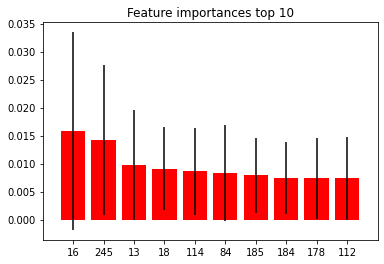

In [ ]:
model = rf_importance(X_train=X_train,y_train=y_train,
                             max_depth=10,top_n=10)

In [ ]:
# select features whose importance > threshold
from sklearn.feature_selection import SelectFromModel

# only 5 features have importance > 0.05
feature_selection = SelectFromModel(model, threshold=0.05,prefit=True) 
selected_feat = X_train.columns[(feature_selection.get_support())]
selected_feat

Index([], dtype='object')

In [ ]:
# only 12 features have importance > 2 times median
feature_selection2 = SelectFromModel(model, threshold='2*median',prefit=True) 
selected_feat2 = X_train.columns[(feature_selection2.get_support())]
selected_feat2

Index(['FFT_Theta_MaxPower', 'Delta/Theta', 'Theta/Alpha',
       '9_Wavelet_Approximate_Mean', '12_Wavelet_Approximate_Entropy',
       '21_Wavelet_Detailed_Energy', 'Permutation_Entropy'],
      dtype='object')

## Gradient Boosted Trees Importance

Feature ranking:
1. feature no:245 feature name:Permutation_Entropy (0.019901)
2. feature no:16 feature name:Delta/Theta (0.016694)
3. feature no:84 feature name:9_Wavelet_Approximate_Mean (0.010495)
4. feature no:244 feature name:Hurst_Exponent (0.008448)
5. feature no:13 feature name:FFT_Theta_MaxPower (0.008011)
6. feature no:45 feature name:4_Wavelet_Approximate_Std_Deviation (0.007479)
7. feature no:181 feature name:21_Wavelet_Approximate_Std_Deviation (0.007474)
8. feature no:141 feature name:16_Wavelet_Approximate_Std_Deviation (0.007243)
9. feature no:74 feature name:7_Wavelet_Approximate_Entropy (0.007231)
10. feature no:237 feature name:28_Wavelet_Approximate_Std_Deviation (0.007198)
11. feature no:12 feature name:FFT_Delta_MaxPower (0.007112)
12. feature no:14 feature name:FFT_Alpha_MaxPower (0.007084)
13. feature no:18 feature name:Theta/Alpha (0.006930)
14. feature no:9 feature name:Skewness (0.006845)
15. feature no:69 feature name:7_Wavelet_Approximate_Std_Deviation (0.0

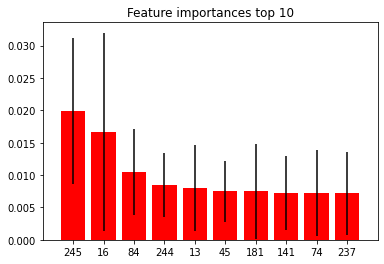

In [ ]:
model = gbt_importance(X_train=X_train,y_train=y_train,
                             max_depth=10,top_n=10)

In [ ]:
# select features whose importance > threshold

# only 8 features have importance > 0.01
feature_selection = SelectFromModel(model, threshold=0.01,prefit=True) 
selected_feat = X_train.columns[(feature_selection.get_support())]
selected_feat

Index(['Delta/Theta', '9_Wavelet_Approximate_Mean', 'Permutation_Entropy'], dtype='object')

In [ ]:
#import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #RandomForestRegressor
#from sklearn.feature_selection import SelectFromModel

# 2018.11.27 Created by Eamon.Zhang

def rf_importance(X_train,y_train,max_depth=10,class_weight=None,top_n=15,n_estimators=50,random_state=0):
    
    model = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,
                                    random_state=random_state,class_weight=class_weight,
                                    n_jobs=-1)
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feat_labels = X_train.columns
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0) #  inter-trees variability. 
    print("Feature ranking:") 
#    l1,l2,l3,l4 = [],[],[],[]
    for f in range(X_train.shape[1]):
        print("%d. feature no:%d feature name:%s (%f)" % (f + 1, indices[f], feat_labels[indices[f]], importances[indices[f]]))
#        l1.append(f+1)
#        l2.append(indices[f])
#        l3.append(feat_labels[indices[f]])
#        l4.append(importances[indices[f]])
    #feature_rank = pd.Dataframe(zip(l1,l2,l3,l4),columns=['id','indice','feature','importances'])
    
    # plotting
    indices = indices[0:top_n]
    plt.figure()
    plt.title("Feature importances top %d" % top_n)
    plt.bar(range(top_n), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(top_n), indices)
    plt.xlim([-1,top_n])
    plt.show() 
    
    return model


def gbt_importance(X_train,y_train,max_depth=10,top_n=15,n_estimators=50,random_state=0):
    
    model = GradientBoostingClassifier(n_estimators=n_estimators,max_depth=max_depth,
                                       random_state=random_state)
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feat_labels = X_train.columns
    std = np.std([tree[0].feature_importances_ for tree in model.estimators_],
                 axis=0) #  inter-trees variability. 
    print("Feature ranking:")   
#    l1,l2,l3,l4 = [],[],[],[]
    for f in range(X_train.shape[1]):
        print("%d. feature no:%d feature name:%s (%f)" % (f + 1, indices[f], feat_labels[indices[f]], importances[indices[f]]))
#        l1.append(f+1)
#        l2.append(indices[f])
#        l3.append(feat_labels[indices[f]])
#        l4.append(importances[indices[f]])
#    feature_rank = pd.Dataframe(zip(l1,l2,l3,l4),columns=['id','indice','feature','importances'])   
    # plotting
    indices = indices[0:top_n]
    plt.figure()
    plt.title("Feature importances top %d" % top_n)
    plt.bar(range(top_n), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(top_n), indices)
    plt.xlim([-1,top_n])
    plt.show() 
    
    return model